In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
pricecsi300 = pd.read_excel(r"D:\BBBB\学校课程\ASP\project\指数行情序列.xlsx")
pricecsi300

,Unnamed: 0,收盘价_x000D_\n[单位] 元,开盘价_x000D_\n[单位] 元,最高价_x000D_\n[单位] 元,最高价_x000D_\n[单位] 元.1,结算价_x000D_\n[单位] 元
0,时间,沪深300,沪深300,沪深300,沪深300,沪深300
1,2023-01-03 00:00:00,3887.8992,3864.8356,3893.9904,3893.9904,NaN
2,2023-01-04 00:00:00,3892.9477,3886.2504,3905.9032,3905.9032,NaN
3,2023-01-05 00:00:00,3968.5782,3913.4928,3974.875,3974.875,NaN
4,2023-01-06 00:00:00,3980.8888,3969.5493,4000.4143,4000.4143,NaN
...,...,...,...,...,...,...
306,2024-04-10 00:00:00,3504.7086,3528.9679,3531.2295,3531.2295,NaN
307,2024-04-11 00:00:00,3504.2447,3485.0294,3520.5893,3520.5893,NaN
308,2024-04-12 00:00:00,3475.8389,3505.7499,3516.6988,3516.6988,NaN
309,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = pd.read_excel(r"D:\BBBB\学校课程\ASP\project\波动率数据\波动率数据\20240412_buy\波动率曲面.xlsx")
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,到期,到期日,合成期货,2800.00,2850.00,2900.00,2950.00,3000.00,3050.00,3100.00,...,3800.00,3850.00,3900.00,3950.00,4000.00,4100.00,4200.00,4300.00,4400.00,4500.00
1,1M,20240511,3471.284,28.39,27.13,25.86,24.59,23.32,22.06,20.79,...,18.10,18.91,19.69,21.21,22.73,25.77,28.82,31.86,34.90,37.94
2,2M,20240611,3459.223,23.72,22.81,21.91,20.77,19.63,18.79,17.94,...,16.64,17.01,17.38,18.00,18.85,20.15,21.85,23.90,25.95,28.00
3,3M,20240711,3447.129,22.81,21.99,21.17,20.08,18.98,18.27,17.55,...,16.69,17.04,17.40,17.80,18.45,19.29,20.52,22.12,23.72,25.33
4,6M,20241011,3422.534,19.83,19.35,18.87,18.32,17.77,17.45,17.12,...,16.59,16.86,17.13,17.49,17.84,18.45,18.94,19.43,19.92,20.40
5,9M,20250111,3444.361,18.89,18.50,18.11,17.77,17.43,17.13,16.83,...,16.33,16.50,16.67,16.89,17.11,17.55,17.99,18.43,18.87,19.31
6,1Y,20250411,3462.097,17.85,17.69,17.53,17.37,17.21,17.05,16.88,...,16.07,16.15,16.23,16.34,16.46,16.69,16.92,17.15,17.38,17.61


In [4]:
from SVI import OptSVI1test
dataarr = data.values
K = dataarr[0,3:]
TT = [30,60,90,180,270,365]
S0 = 3475.8389
w = np.ones((6, 30))  # weights for each option
Vol = np.array(dataarr[1:,3:])

p = np.ones((6, 5)) * 0.0 # initial guess for SVI parameters
p[4:,:] = 0.003
for i in range(6):
    fun = lambda p: OptSVI1test(i, Vol, w, p, K, S0, TT)
    res = minimize(fun, p[i,:], options={'maxiter': 1000})
    p[i,:] = res.x

print(p)
np.save('para_svi.npy', p)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # 创建一个2x3的子图网格
for i in range(6):
    f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)
    x = np.linspace(-0.3, 0.3, 100)
    ax[i//3, i%3].plot(x, f(x),label = 'SVI IV', color='b')  # 选择子图
    ImpVol = Vol[i,:]
    x = np.array(K / S0).astype(float)
    ax[i//3, i%3].scatter(np.log(x), ImpVol,label='Market IV',color='r')
    ax[i//3, i%3].set_title('TT = %d' % TT[i])
    ax[i//3, i%3].legend()
    
plt.show()
fig.savefig('subplot.jpg')  # 保存整个子图网格为一个jpg文件

KeyboardInterrupt: 

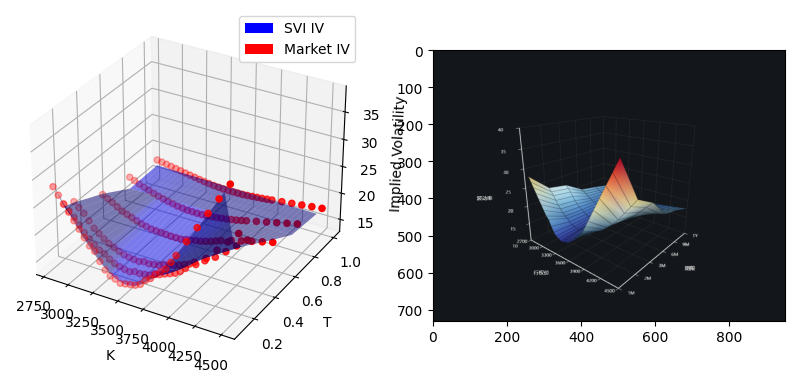

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.image import imread

# Create a figure with two subplots, one of which is a 3D plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

Z = []
for i in range(6):
    f = lambda x: np.sqrt(np.maximum(p[i, 0] + p[i, 1] * (p[i, 2] * (x - p[i, 3]) + np.sqrt((x - p[i, 3]) ** 2 + p[i, 4])), 0)) / np.sqrt(TT[i] / 365)
    x = (np.arange(2800, 4500, 50) / S0)
    Z.append(f(np.log(x)))

X, Y = np.meshgrid(np.arange(2800, 4500, 50),np.array(TT) / 365)
ax.plot_surface(X, Y, np.array(Z), alpha=0.5, color='blue')

xx = np.array(TT) / 365
ax.scatter(K, np.ones(len(K))*xx[0], Vol[0,:], color='red')
ax.scatter(K, np.ones(len(K))*xx[1], Vol[1,:], color='red')
ax.scatter(K, np.ones(len(K))*xx[2], Vol[2,:], color='red')
ax.scatter(K, np.ones(len(K))*xx[3], Vol[3,:], color='red')
ax.scatter(K, np.ones(len(K))*xx[4], Vol[4,:], color='red')
ax.scatter(K, np.ones(len(K))*xx[5], Vol[5,:], color='red')

ax.set_xlabel('K')
ax.set_ylabel('T')
ax.set_zlabel('Implied Volatility')

legend_elements = [Patch(facecolor='blue', label='SVI IV'),
                   Patch(facecolor='red', label='Market IV')]
ax.legend(handles=legend_elements)

# Load image from local file
img = imread('D:\\BBBB\\学校课程\\ASP\\project\\波动率数据\\波动率数据\\20240412_buy\\波动率曲面.png')

# Display the image
ax2.imshow(img)

plt.show()

*** Heston-Dupire ***

In [1]:
import numpy as np
import pyfeng as pf

strike = np.arange(3200, 3800, 50)
sigma, vov, mr, rho, texp, spot = 0.3, 1, 0.5, -0.9, 20, 3475.8389
m = pf.HestonMcAndersen2008(sigma, vov=vov, mr=mr, rho=rho)
m.set_num_params(n_path=1e5, dt=1/8, rn_seed=123456)
m.price(strike, spot, texp)

array([2173.37322685, 2159.79147834, 2146.32618077, 2132.97562889,
       2119.73816173, 2106.6121608 , 2093.59604845, 2080.68828627,
       2067.88737358, 2055.19184608, 2042.60027443, 2030.11126299])

In [ ]:
m = pf.HestonFft(sigma, vov=vov, mr=mr, rho=rho)
print('true price:', m.price(strike, spot, texp))


true price: [2179.1687118  2165.58955528 2152.12619518 2138.77693923 2125.54013936
 2112.41418991 2099.39752597 2086.48862177 2073.68598919 2060.98817631
 2048.39376609 2035.90137504]


In [2]:
# Heaton-Dupire
from heston_mc import HestonMcAndersen2008
m = HestonMcAndersen2008(sigma, vov=vov, mr=mr, rho=rho)
m.set_num_params(n_path=1e5, dt=1/8, rn_seed=123456)
m.price(strike, spot, texp)
print('end')

Heston-Dupire:  [2735.89275478 2730.05217328 2724.26999091 2718.53980738 2712.86506291
 2707.24863373 2701.68199126 2696.16628874 2690.70320039 2685.29234796
 2679.93103159 2674.62793228]
end
